In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [5]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US.dropna(subset='salary_year_avg', inplace=True)

In [9]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [50]:
df_skills = df_DA_US.groupby(by='job_skills')['salary_year_avg'].agg(
    count = 'size', 
    median = 'median'
    )

df_top_demand = df_skills.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

df_top_pay = df_skills.sort_values(by='median', ascending=False).head(10)


In [51]:
df_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [52]:
df_top_demand

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


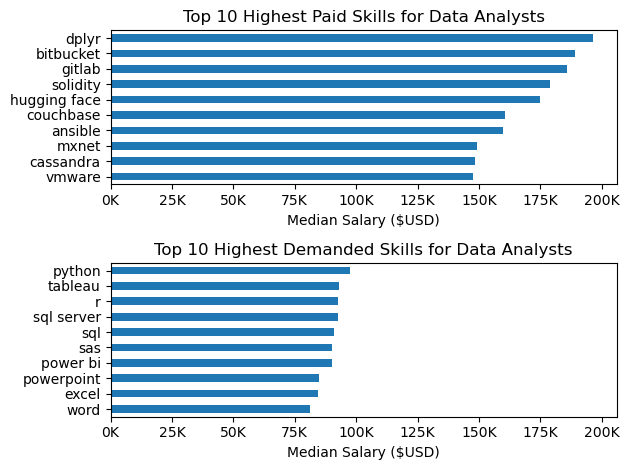

In [56]:
fig, ax = plt.subplots(2,1)

#Top 10 Highest Paid Skills for Data Analysts
df_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('Median Salary ($USD)')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{(x/1000):.0f}K'))

#Top 10 Most In-Demand for Data Analysts
df_top_demand[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{(x/1000):.0f}K'))
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()